# Team Members(Project 2)
## 1. Nicolas Jugganaikloo 2. Suyash Mhetre

In [26]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

#countplot
#catplot x=pclass hue=sex data= kind='count'
#catplot x=pclass hue=sex data= kind='count col=survived'
#group by has easy thing like groupby().size() or agg
#reg plot scatter with line minimized for distance to line in just the vertical sense

### Load data and show Column names

In [2]:
austin= pd.read_csv("data/crime-housing-austin-2015.csv")
list(austin)

['Key',
 'Council_District',
 'Highest_Offense_Desc',
 'Highest_NIBRS_UCR_Offense_Description',
 'Report_Date',
 'Location',
 'Clearance_Status',
 'Clearance_Date',
 'District',
 'Zip_Code_Crime',
 'Census_Tract',
 'X_Coordinate',
 'Y_Coordinate',
 'Zip_Code_Housing',
 'Populationbelowpovertylevel',
 'Medianhouseholdincome',
 'Non-WhiteNon-HispanicorLatino',
 'HispanicorLatinoofanyrace',
 'Populationwithdisability',
 'Unemployment',
 'Largehouseholds(5+members)',
 'Homesaffordabletopeopleearninglessthan$50000',
 'Rentalsaffordabletopeopleearninglessthan$25000',
 'Rent-restrictedunits',
 'HousingChoiceVoucherholders',
 'Medianrent',
 'Medianhomevalue',
 'Percentageofrentalunitsinpoorcondition',
 'Percentchangeinnumberofhousingunits2000-2012',
 'Ownerunitsaffordabletoaverageretail/serviceworker',
 'Rentalunitsaffordabletoaverageretail/serviceworker',
 'Rentalunitsaffordabletoaverageartist',
 'Ownerunitsaffordabletoaverageartist',
 'Rentalunitsaffordabletoaverageteacher',
 'Ownerunitsaffo

### Show sample Data

In [3]:
austin.head()


,Key,Council_District,Highest_Offense_Desc,Highest_NIBRS_UCR_Offense_Description,Report_Date,Location,Clearance_Status,Clearance_Date,District,Zip_Code_Crime,...,Rentalunitsaffordabletoaverageteacher,Ownerunitsaffordabletoaverageteacher,Rentalunitsaffordabletoaveragetechworker,Ownerunitsaffordabletoaveragetechworker,Changeinpercentageofpopulationbelowpoverty2000-2012,Changeinmedianrent2000-2012,Changeinmedianhomevalue2000-2012,Percentageofhomeswithin1/4-mioftransitstop,Averagemonthlytransportationcost,Percentageofhousingandtransportationcoststhatistransportation-related
0,201510782,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-15,9001 N IH 35 SVRD NB,N,28-Jan-15,E,78753.0,...,89%,75%,100%,98%,128%,26%,40%,59%,$708,44%
1,201511231,4.0,ROBBERY BY ASSAULT,Robbery,1-Jan-15,919 E KOENIG LN SVRD EB,N,13-Jan-15,I,78751.0,...,68%,10%,97%,42%,23%,38%,97%,98%,$550,40%
2,201511736,1.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,12151 N IH 35 SVRD NB,N,13-Jan-15,E,78753.0,...,89%,75%,100%,98%,128%,26%,40%,59%,$708,44%
3,201511433,4.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,1044 NORWOOD PARK BLVD,N,5-Jan-15,I,78753.0,...,89%,75%,100%,98%,128%,26%,40%,59%,$708,44%
4,201511936,2.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,2413 BITTER CREEK DR,N,7-Jan-15,F,78744.0,...,81%,87%,100%,100%,89%,26%,44%,63%,$708,40%


In [4]:
for col in list(austin):
    if austin[col].dtype != np.int64 and austin[col].dtype != np.float64:
        austin[col] = austin[col].str.replace('%','')
        austin[col] = austin[col].str.replace('$','')
        if austin[col].str.isnumeric().any():
            austin[col] = austin[col].astype("float64")


## Is the east side more dangerous than the west?

0.29603913429245005

0.0027851344280068768

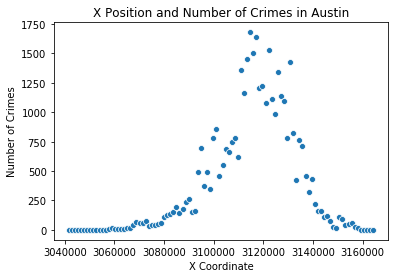

In [5]:
XCrimeBins=pd.cut(austin.X_Coordinate.sort_values(ascending=True).dropna(),bins=100,retbins=True)#[0].value_counts( sort=False)
corr, p_value = pearsonr(XCrimeBins[1][1:], XCrimeBins[0].value_counts( sort=False))

display(corr )
display(p_value)

plot=sns.scatterplot(x=XCrimeBins[1][1:] ,y=XCrimeBins[0].value_counts( sort=False))
plt.title("X Position and Number of Crimes in Austin")
plt.ylabel('Number of Crimes')
plt.xlabel('X Coordinate')
plot.get_figure().savefig("FullCity")



 This shows that there is more crime around some center point but does not indicate that west is more dangeours than the east. Also more crime in the graph
    is proable higly related to populations

## Do any zip codes have a side that has more crime than the other side

In [ ]:
for zipc in austin["Zip_Code_Crime"].unique():
        display(zipc)
        zipdf=austin[austin.Zip_Code_Crime== zipc]
        XCrimeBins=pd.cut(zipdf.X_Coordinate.sort_values(ascending=True).dropna(),bins=100,retbins=True)#[0].value_counts( sort=False)
        #display(len(XCrimeBins[1][1:]) )
        #display(len(XCrimeBins[0].value_counts( sort=False)))
        if(len(XCrimeBins[1])>0):
            corr, p_value = pearsonr(XCrimeBins[1][1:], XCrimeBins[0].value_counts( sort=False))
            display(corr )
            display(p_value)
            plot=sns.scatterplot(x=XCrimeBins[1][1:] ,y=XCrimeBins[0].value_counts( sort=False))
            for item in plot.get_xticklabels():
                item.set_rotation(45)
            plt.title(f"X Position and Number of Crimes in Austin ({int(zipc)})")
            plt.ylabel('Number of Crimes')
            plt.xlabel('X Coordinate')
            plt.tight_layout()

            plot.get_figure().savefig(f"{zipc}.png")
       # plot.fig.suptitle(zipc, fontsize=12)

        plt.show()

Remove Day and Year

In [7]:
austin["ClearanceMonth"] =austin["Report_Date"].str.replace("-","");
austin["ClearanceMonth"] =austin["ClearanceMonth"].str.replace("1","");
austin["ClearanceMonth"] =austin["ClearanceMonth"].str.replace("2","");
austin["ClearanceMonth"] =austin["ClearanceMonth"].str.replace("3","");
austin["ClearanceMonth"] =austin["ClearanceMonth"].str.replace("4","");
austin["ClearanceMonth"] =austin["ClearanceMonth"].str.replace("5","");
austin["ClearanceMonth"] =austin["ClearanceMonth"].str.replace("6","");
austin["ClearanceMonth"] =austin["ClearanceMonth"].str.replace("7","");
austin["ClearanceMonth"] =austin["ClearanceMonth"].str.replace("8","");
austin["ClearanceMonth"] =austin["ClearanceMonth"].str.replace("9","");
austin["ClearanceMonth"] =austin["ClearanceMonth"].str.replace("0","");



austin[["ClearanceMonth"]].head()

,ClearanceMonth
0,Jan
1,Jan
2,Jan
3,Jan
4,Jan


## The average rate of crime for each month in every district

/home/nick/cs5830/lib/python3.6/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/nick/cs5830/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


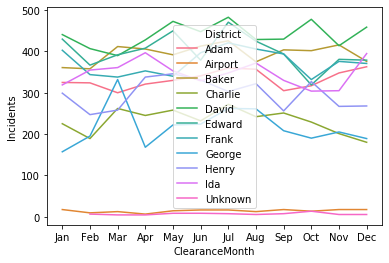

In [8]:
districtMonthlyCrimes=austin.groupby(["District","ClearanceMonth"]).agg(Incidents=("Clearance_Status","count"))
districtMonthlyCrimes=districtMonthlyCrimes.reset_index()
districtMonthlyCrimes.District=districtMonthlyCrimes.District.map({"A" :"Adam", "AP" :"Airport", "B" :"Baker", "C": "Charlie", "D": "David", "E": "Edward", "F" :"Frank" ,"G": "George" ,"H" :"Henry", "I" :"Ida" ,"UK" :"Unknown"})
cats = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
districtMonthlyCrimes['ClearanceMonth'] = pd.Categorical(districtMonthlyCrimes['ClearanceMonth'], ordered=True, categories=cats)
sns.lineplot(x="ClearanceMonth",y="Incidents",data = districtMonthlyCrimes,hue="District",legend="full")

## The average rate of crime for each month in every district (Normalized)

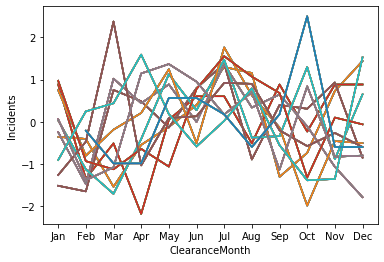

In [12]:
for district in districtMonthlyCrimes.District:
    CurrentDistrict=districtMonthlyCrimes[districtMonthlyCrimes.District== district]
    CurrentDistrict.Incidents=(CurrentDistrict.Incidents-CurrentDistrict.Incidents.mean())/CurrentDistrict.Incidents.std()
    sns.lineplot(x="ClearanceMonth",y="Incidents",data = CurrentDistrict)

In [13]:
districtMonthlyCrimes


,District,ClearanceMonth,Incidents
0,Adam,Apr,321
1,Adam,Aug,357
2,Adam,Dec,363
3,Adam,Feb,324
4,Adam,Jan,325
...,...,...,...
126,Unknown,Mar,4
127,Unknown,May,8
128,Unknown,Nov,5
129,Unknown,Oct,13


In [14]:
AvgMonthlyCrimePerDistrict=districtMonthlyCrimes.groupby(["District"]).agg(AverageMonthlyCrimes=("Incidents","mean"),StdMonthlyCrimes=("Incidents","std")).reset_index()
AvgMonthlyCrimePerDistrict

,District,AverageMonthlyCrimes,StdMonthlyCrimes
0,Adam,332.583333,21.146495
1,Airport,13.833333,3.588703
2,Baker,395.083333,22.484170
3,Charlie,232.166667,29.197862
4,David,440.000000,29.291637
5,Edward,399.583333,40.587634
6,Frank,372.916667,30.982277
7,George,217.750000,48.125074
8,Henry,296.833333,35.986950
9,Ida,347.333333,31.239059


## Average month crime rate in each district

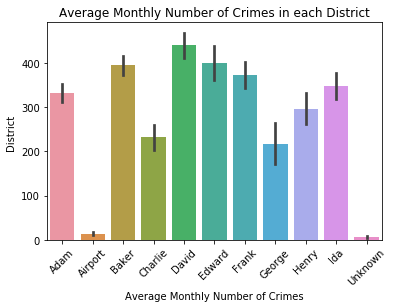

In [15]:
plot=sns.barplot(x="District", y="Incidents", ci="sd",data=districtMonthlyCrimes)
for item in plot.get_xticklabels():
    item.set_rotation(45)
plt.title("Average Monthly Number of Crimes in each District")
plt.xlabel('Average Monthly Number of Crimes')
plt.ylabel('District ')
plot.get_figure().savefig("barplot.png")

In [1]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [12]:
df = pd.read_csv('crime_housing.csv')

## Analyze number of offense every month 

In [3]:
df['Report_Date'] = df['Report_Date'].astype('datetime64[ns]')
month = df.Report_Date.dt.month
df['Report_month'] = month
df.Report_month.head()

0    1
1    1
2    1
3    1
4    1
Name: Report_month, dtype: int64

In [4]:
df1 = df.groupby(['Report_month','Highest_NIBRS_UCR_Offense_Description']).agg({'Highest_NIBRS_UCR_Offense_Description':'size'})
df1.columns=['Offense_Count']
df1.reset_index(drop=False,inplace=True)

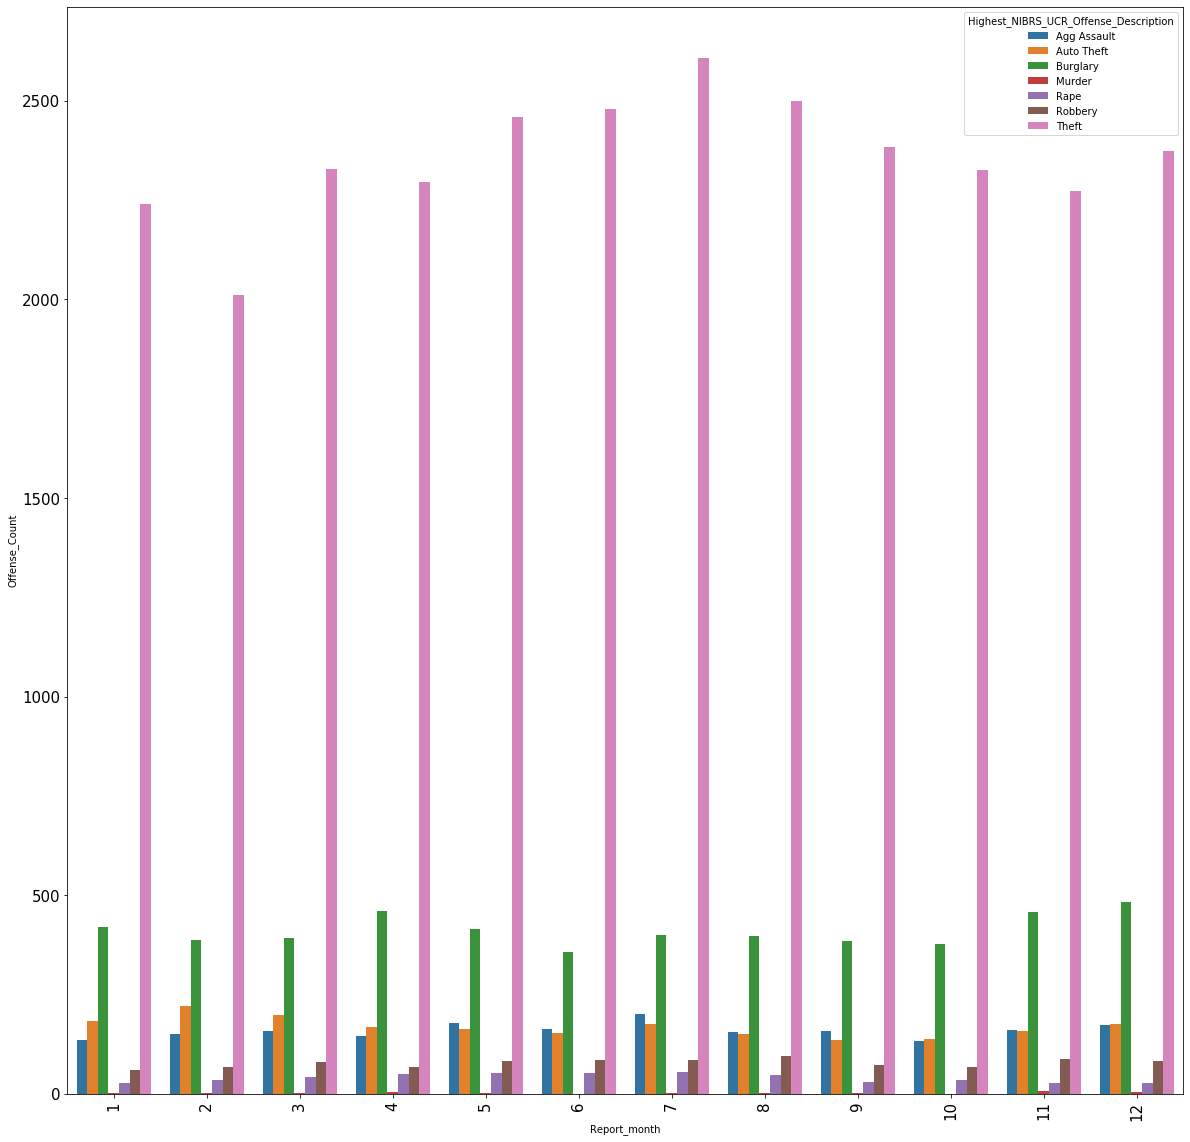

In [27]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
sns.barplot(x= df1.Report_month, y= df1.Offense_Count, hue = df1.Highest_NIBRS_UCR_Offense_Description, data=df1)
plt.savefig('offense_count_per_month')

In [6]:
data = df.groupby(['Zip_Code_Crime','Unemployment','Populationbelowpovertylevel','Medianhouseholdincome']).agg({'Highest_NIBRS_UCR_Offense_Description':'size'})
data.rename(columns ={'Highest_NIBRS_UCR_Offense_Description':'Offense_Count'}, inplace=True)
data.reset_index(drop=False, inplace=True)
data['Unemployment'] = data['Unemployment'].str.replace('%', '').astype('float')
data['Populationbelowpovertylevel'] = data['Populationbelowpovertylevel'].str.replace('%', '').astype('float')
data['Medianhouseholdincome'] = data['Medianhouseholdincome'].str.replace('$', '')
data['Medianhouseholdincome'] = data['Medianhouseholdincome'].str.replace(',', '').astype('float')
data = data.iloc[:,-4:]
data.head()

,Unemployment,Populationbelowpovertylevel,Medianhouseholdincome,Offense_Count
0,15.0,18.0,43957.0,276
1,9.0,20.0,68152.0,2103
2,11.0,33.0,34734.0,1668
3,4.0,10.0,92606.0,738
4,7.0,21.0,50248.0,2571


# Analyze correlation between Poverty level and offense count

(0.41141626482185467, 0.012671210136243517)

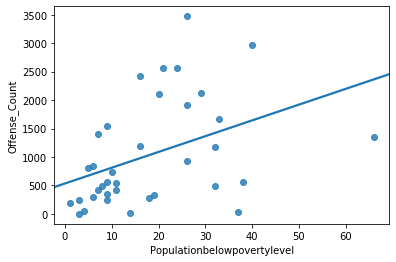

In [28]:
from scipy import stats

display(stats.pearsonr(data.Populationbelowpovertylevel,data.Offense_Count))
sns.regplot('Populationbelowpovertylevel', 'Offense_Count', data=data, ci=None)
plt.savefig('pearson_correlation_Polution_offense_count')

## Clearly we can seee that there is not a very good correlation between poverty level and offense count. So I tried to see correlation  of crime rate with other columns in following graph

In [8]:
dt = pd.DataFrame()
for df in data:
    if df not in dt:
        dt[df] = np.log(data[df]).diff()
dt = dt[1:]
dt.head()

,Unemployment,Populationbelowpovertylevel,Medianhouseholdincome,Offense_Count
1,-0.510826,0.105361,0.438529,2.030719
2,0.200671,0.500775,-0.674021,-0.231740
3,-1.011601,-1.193922,0.980635,-0.815437
4,0.559616,0.741937,-0.611383,1.248106
5,0.693147,1.145132,-1.439005,-0.647158


In [9]:
dt.corr()

,Unemployment,Populationbelowpovertylevel,Medianhouseholdincome,Offense_Count
Unemployment,1.000000,0.744336,-0.804121,0.188123
Populationbelowpovertylevel,0.744336,1.000000,-0.916215,0.402603
Medianhouseholdincome,-0.804121,-0.916215,1.000000,-0.342046
Offense_Count,0.188123,0.402603,-0.342046,1.000000


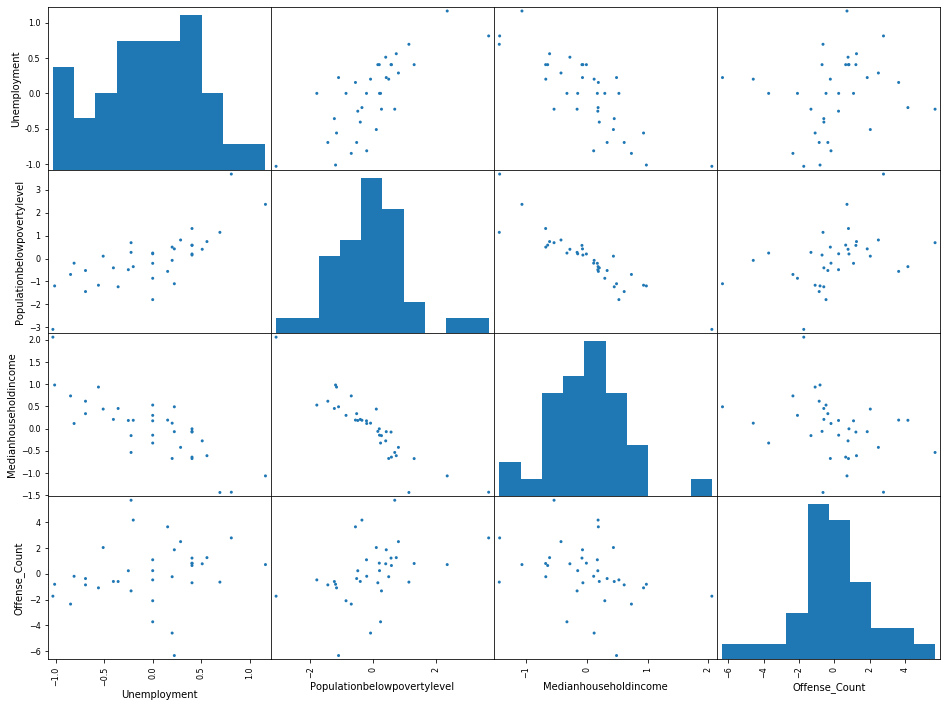

In [29]:
from pandas.plotting import scatter_matrix
scatter_matrix(dt, figsize=(16,12),alpha = 1)
plt.savefig('scatteer_matrix')

# Ttest for Homes affordable to peopleearning < 50,000USD in two districts 

In [13]:
for key,value in df.groupby('District'):
    print(key)
    display(value.shape[0])

A


4256

AP


178

B


4856

C


2934

D


5692

E


5058

F


4694

G


2711

H


3776

I


4309

UK


109

In [24]:
df = pd.read_csv('crime_housing.csv')
df.rename(columns = {'Homesaffordabletopeopleearninglessthan$50000':'Homesaffordabletopeopleearninglessthan50000'}, inplace = True) 

df['Homesaffordabletopeopleearninglessthan50000'] = df['Homesaffordabletopeopleearninglessthan50000'].str.replace('%', '')
df['Homesaffordabletopeopleearninglessthan50000'] = df['Homesaffordabletopeopleearninglessthan50000'].str.replace(',', '').astype('float')
# df = df.apply (pd.to_numeric, errors='coerce')
# df = df.reset_index(drop=True)
df['Homesaffordabletopeopleearninglessthan50000'].head()

0    78.0
1    11.0
2    78.0
3    78.0
4    93.0
Name: Homesaffordabletopeopleearninglessthan50000, dtype: float64

Ttest_indResult(statistic=-245.0202112955119, pvalue=0.0)

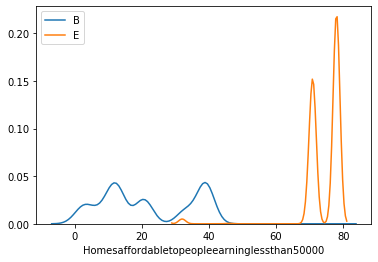

In [30]:
from scipy import stats

# df = df.apply (pd.to_numeric, errors='coerce')
df = df.dropna()
# df = df.reset_index(drop=True)
sns.distplot(df[df.District == 'B'].Homesaffordabletopeopleearninglessthan50000, label='B', hist=False)
sns.distplot(df[df.District == 'E'].Homesaffordabletopeopleearninglessthan50000, label='E', hist=False)

# display(stats.ttest_ind(df[df.State == 'UT'].Score, df[df.State == 'AL'].Score))
display(stats.ttest_ind(df[df.District == 'B'].Homesaffordabletopeopleearninglessthan50000,df[df.District == 'E'].Homesaffordabletopeopleearninglessthan50000))
plt.savefig('Ttest_HomesAffordable')

## As the p-value is less than 0.05 we reject the null hypothesis that there's no difference between the means and conclude that a significant difference does exist.

In [32]:
df = pd.read_csv('crime_housing.csv')
df.rename(columns = {'Rentalsaffordabletopeopleearninglessthan$25000':'Rentalsaffordabletopeopleearninglessthan25000'}, inplace = True) 
# df.rename(columns = {'Homesaffordabletopeopleearninglessthan$50000':'NWHL'}, inplace = True) 

df['Rentalsaffordabletopeopleearninglessthan25000'] = df['Rentalsaffordabletopeopleearninglessthan25000'].str.replace('%', '')
df['Rentalsaffordabletopeopleearninglessthan25000'] = df['Rentalsaffordabletopeopleearninglessthan25000'].str.replace(',', '').astype('float')
# df = df.apply (pd.to_numeric, errors='coerce')
# df = df.reset_index(drop=True)
df['Rentalsaffordabletopeopleearninglessthan25000'].head()

0    14.0
1    13.0
2    14.0
3    14.0
4     7.0
Name: Rentalsaffordabletopeopleearninglessthan25000, dtype: float64

Ttest_indResult(statistic=-27.403393582575227, pvalue=4.700927620798338e-159)

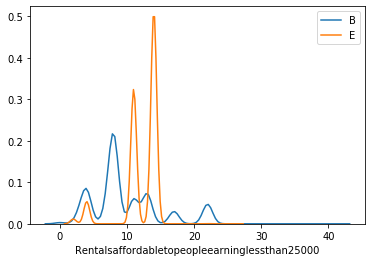

In [33]:
from scipy import stats

# df = df.apply (pd.to_numeric, errors='coerce')
df = df.dropna()
# df = df.reset_index(drop=True)
sns.distplot(df[df.District == 'B'].Rentalsaffordabletopeopleearninglessthan25000, label='B', hist=False)
sns.distplot(df[df.District == 'E'].Rentalsaffordabletopeopleearninglessthan25000, label='E', hist=False)

# display(stats.ttest_ind(df[df.State == 'UT'].Score, df[df.State == 'AL'].Score))
display(stats.ttest_ind(df[df.District == 'B'].Rentalsaffordabletopeopleearninglessthan25000,df[df.District == 'E'].Rentalsaffordabletopeopleearninglessthan25000))
plt.savefig('rentals_affordable')

## As the p-value is greater than 0.05 we cannot conclude that a significant difference exists.